# Wildfires by Large River Basins (HUC-4)

### Overview
* Over the past several decades, there has been an increase in large wildfires in the United States. 

* Fires can be ignited by natural (e.g., lightning) or human causes (Prestemon et al., 2013). Once a fire has been ignited, it's behavior is dependent on the availability of fuel as well as the weather and the topography of the location ((Prestemon et al., 2013; Moore, 2021). For example, if there is abundant dry vegetation, a fire will burn more rapidly (Moore, 2021). Hot, dry, and windy weather also facilitate spread in larger wildfires (Nagy et al., 2018). Thus, climate change contributes to wildfire patterns.

* Human-caused ignitions in the United States account for 84% of all wildfires and about half of the total area burned (Balch et al., 2017). Additionally, nearly all (97%) of wildfires that threaten residential homes have human causes (Mietkiewicz et al., 2020). Human ignitions have expanded the range of wildfires by introducing ignitions in places where conditions are vulnerable to wildfires but lightning is uncommon (Balch et al., 2017). As a result, addressing human ignitions would help reduce the overall impact and increasing trends in wildfires.

### References
Balch, J. K., Bradley, B. A., Abatzoglou, J. T., Nagy, R. C., Fusco, E. J., & Mahood, A. L. (2017). Human-started wildfires expand the fire niche across the United States. Proceedings of the National Academy of Sciences, 114(11), 2946-2951.

Environmental Protection Agency (2023, July 21). Climate Change Indicators: Wildfires. Environmental Protection Agency. Accessed October 10, 2023 from: https://www.epa.gov/climate-indicators/climate-change-indicators-wildfires#ref21

Mietkiewicz, N., Balch, J. K., Schoennagel, T., Leyk, S., St. Denis, L. A., & Bradley, B. A. (2020). In the line of fire: consequences of human-ignited wildfires to homes in the US (1992–2015). Fire, 3(3), 50.

Moore, A. (2021, Dec 3). Explainer: How Wildfires Start and Spread. NC State University. Accessed October 10, 2023 from: https://cnr.ncsu.edu/news/2021/12/explainer-how-wildfires-start-and-spread/

Nagy, R. C., Fusco, E., Bradley, B., Abatzoglou, J. T., & Balch, J. (2018). Human-related ignitions increase the number of large wildfires across US ecoregions. Fire, 1(1), 4.

Prestemon, J. P., & Prestemon, J. P. (2013). Wildfire ignitions: a review of the science and recommendations for empirical modeling (p. 24). Asheville, NC, USA: US Department of Agriculture, Forest Service, Southern Research Station.

### Data Description
* This analysis includes fire data from the Fire Program Analysis fire-occurrence database (FPA FOD). The dataset includes 2.3 millions wildfire records for which a discovery date, a fire size, and a location at least as specific as a square mile grid were available
* Watershed subregions are based on USGS's Watershed Boundary Dataset. The analysis used the HUC-4 level, which represents 245 subregions with shared hydrologic features (USGS, n.d).)
* State boundary data is from the ArcGIS Hub and based on boundaries from the U.S. census.
* Fire data was joined to subregional watershed data and to state boundaries, respectively, to examine variations in fire patterns across these two geographical areas.

### Data Citation
* U.S. Geological Survey (2023). Watershed Boundary Dataset (v2.3.1), accessed October 8, 2023 at https://www.usgs.gov/national-hydrography/access-national-hydrography-products

* Short, Karen C. 2022. Spatial wildfire occurrence data for the United States, 1992-2020 [FPA_FOD_20221014]. 6th Edition. Fort Collins, CO: Forest Service Research Data Archive. https://doi.org/10.2737/RDS-2013-0009.6

In [1]:
# Import Packages
import os
import pathlib

import cartopy.crs as ccrs
import earthpy as et
import geopandas as gpd
import geoviews as gv
import holoviews as hv
import hvplot.pandas
import pandas as pd
import pyogrio

In [2]:
# Get url for watershed boundaries
wbd_url = (
    "https://prd-tnm.s3.amazonaws.com/StagedProducts/"
    "Hydrography/WBD/National/GDB/WBD_National_GDB.zip"
)

# Get data from url
wbd_path = et.data.get_data(url=wbd_url)

# Path to watershed boundary data
wbd_path

'/home/jovyan/earth-analytics/data/earthpy-downloads/WBD_National_GDB'

In [3]:
# Get 2-digit HU layer
wbd4_gdb = gpd.read_file(
    os.path.join(wbd_path, "WBD_National_GDB.gdb"),
    driver="OpenFileGBD",
    layer="WBDHU4",
    from_disk=True,
)

wbd4_gdb

,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,referencegnis_ids,areaacres,areasqkm,states,huc4,name,globalid,shape_Length,shape_Area,geometry
0,{66B87799-AF14-41BA-9F11-330BF38FA0A5},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},NaN,U.S. Geological Survey,NaN,2022-01-18 16:24:27+00:00,NaN,13203421.45,53432.40,"NM,TX",1307,Lower Pecos,{A41C097B-67A1-416D-9C4B-5C79419D50F8},16.748899,5.057862,"MULTIPOLYGON (((-103.84649 33.01354, -103.8452..."
1,{ACA0AE30-DBB9-4247-9C7E-9B04B698288B},{6CA98F7B-EF37-4903-BC3B-F81A303AF1FD},NaN,U.S. Geological Survey,NaN,2021-12-13 10:48:14+00:00,NaN,3372434.63,13647.77,"MX,TX",1309,Lower Rio Grande,{55FE0BC7-43F3-4227-A5EE-AC0F20828622},10.835984,1.232534,"MULTIPOLYGON (((-98.80212 26.95795, -98.79537 ..."
2,{06AFD216-7C75-4B14-A3FD-327ADC873FCD},{6CA98F7B-EF37-4903-BC3B-F81A303AF1FD},NaN,U.S. Geological Survey,NaN,2021-12-13 10:48:14+00:00,NaN,18423392.00,74556.89,TX,1211,Nueces-Southwestern Texas Coastal,{16D89800-EE50-4243-A008-F42664FE5424},17.309713,6.844815,"MULTIPOLYGON (((-100.40903 30.12027, -100.4080..."
3,{0E918E79-0C68-4381-920B-3A08077F4ED3},{31AC21ED-1551-431B-963A-63D44B9887E8},NaN,U.S. Geological Survey,NaN,2022-01-02 20:20:35+00:00,NaN,8472484.56,34286.96,CA,1806,Central California Coastal,{359702D5-6061-47D0-B9DC-B477921BFA5E},16.125924,3.410020,"MULTIPOLYGON (((-122.11788 37.25462, -122.1175..."
4,{7E32DC94-E57D-4114-A4FA-8F91DCC89CC6},{93C374CC-EFFC-4F80-B73B-B02CB768ABCE},NaN,U.S. Geological Survey,NaN,2022-01-03 14:19:40+00:00,NaN,8861368.04,35860.72,"CA,MX",1807,Southern California Coastal,{E7C8A802-D2FA-440B-A9BF-9B8D0D0D1BD6},18.029736,3.484674,"MULTIPOLYGON (((-119.10906 34.82364, -119.1086..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,{0067D865-23F8-458D-A526-A8691E422229},NaN,NaN,NaN,NaN,2021-01-07 13:33:54+00:00,NaN,17599860.04,71224.17,"MD,NY,PA",0205,Susquehanna,{8BBB291A-3E9A-451C-8EFE-7605EEB55343},27.506763,7.653455,"MULTIPOLYGON (((-75.19653 42.98591, -75.19594 ..."
241,{403D50BA-AB23-4953-A9E3-88D309830AF8},NaN,NaN,NaN,NaN,2020-11-03 11:01:54+00:00,NaN,11534902.05,46680.13,"DE,MD,NJ,NY,PA,VA",0204,Delaware-Mid Atlantic Coastal,{0B0689F9-E42B-4307-ADCD-E828096CF5C2},23.613899,4.939448,"MULTIPOLYGON (((-74.59898 42.46011, -74.59866 ..."
242,{6F1A4B05-D4F4-4CCC-B2F6-3145111E2FA8},{23FC16E5-372F-475A-A0B1-4459BD8F69F4},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,NaN,2021-05-17 14:04:02+00:00,NaN,4690028.03,18979.89,"CT,NJ,NY,RI",0203,Lower Hudson-Long Island,{D9A10A5D-54FE-44CC-B8E5-943E7548DE08},15.607259,2.027672,"MULTIPOLYGON (((-73.02556 41.21327, -73.02548 ..."
243,{567B48C4-0554-419E-9998-BFCAF8F57203},{060BB0D6-9C9A-4919-A859-0787C89C6807},NaN,U.S. Geological Survey,NaN,2023-04-11 16:22:34+00:00,NaN,3103935.02,12561.19,"CT,MA,NY,RI",0110,Connecticut Coastal,{FC9F81F3-BF45-4AA7-A2F4-9750D62C0CEB},18.418394,1.358411,"MULTIPOLYGON (((-73.02573 41.21304, -73.02548 ..."


<Axes: >

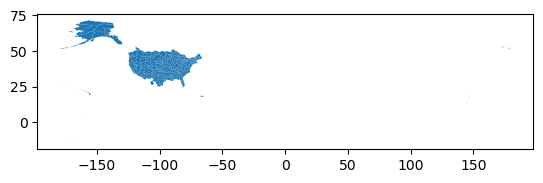

In [4]:
# Test Plot of Data to Check Import
wbd4_gdb.plot()

In [5]:
# Define url for the fire data
fire_url = (
    "https://www.fs.usda.gov/rds/archive/products/"
    "RDS-2013-0009.6/RDS-2013-0009.6_Data_Format2_GDB.zip"
)

# Define directory for fire data
fire_dir = et.data.get_data(url=fire_url)

fire_dir

'/home/jovyan/earth-analytics/data/earthpy-downloads/RDS-2013-0009.6_Data_Format2_GDB'

In [6]:
# Define path for fire geodatabase
fire_path = os.path.join(fire_dir, "Data", "FPA_FOD_20221014.gdb")

# Load data
if not "fire_gdf" in globals():
    print("fires_gdf does not exist. Loading data.")
    fire_gdf = pyogrio.read_dataframe(fire_path, layer="Fires")

fire_gdf.head()

fires_gdf does not exist. Loading data.


,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,...,0.10,A,40.036944,-121.005833,USFS,CA,63,06063,Plumas County,POINT (-121.00582 40.03694)
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,...,0.25,A,38.933056,-120.404444,USFS,CA,61,06061,Placer County,POINT (-120.40443 38.93305)
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,...,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,06017,El Dorado County,POINT (-120.73554 38.98416)
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,...,0.10,A,38.559167,-119.913333,USFS,CA,3,06003,Alpine County,POINT (-119.91332 38.55916)
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,...,0.10,A,38.559167,-119.933056,USFS,CA,3,06003,Alpine County,POINT (-119.93304 38.55916)


In [7]:
# Select variables
fire_clean_gdf = fire_gdf[
    [
        "FOD_ID",
        "LATITUDE",
        "LONGITUDE",
        "DISCOVERY_DATE",
        "NWCG_GENERAL_CAUSE",
        "FIRE_SIZE",
        "geometry",
    ]
].set_index("FOD_ID")

# Reformat Discovery Date as a Datetime
fire_clean_gdf.DISCOVERY_DATE = pd.to_datetime(fire_clean_gdf.DISCOVERY_DATE)

# Change CRS
fire_clean_gdf = fire_clean_gdf.to_crs(wbd4_gdb.crs)

fire_clean_gdf

,LATITUDE,LONGITUDE,DISCOVERY_DATE,NWCG_GENERAL_CAUSE,FIRE_SIZE,geometry
FOD_ID,,,,,,
1,40.036944,-121.005833,2005-02-02,Power generation/transmission/distribution,0.10,POINT (-121.00582 40.03694)
2,38.933056,-120.404444,2004-05-12,Natural,0.25,POINT (-120.40443 38.93305)
3,38.984167,-120.735556,2004-05-31,Debris and open burning,0.10,POINT (-120.73554 38.98416)
4,38.559167,-119.913333,2004-06-28,Natural,0.10,POINT (-119.91332 38.55916)
5,38.559167,-119.933056,2004-06-28,Natural,0.10,POINT (-119.93304 38.55916)
...,...,...,...,...,...,...
400732978,39.037890,-108.959500,2020-06-05,Natural,1.00,POINT (-108.95949 39.03788)
400732979,37.148611,-119.503056,2020-07-11,Missing data/not specified/undetermined,100.00,POINT (-119.50304 37.14861)
400732980,46.151370,-114.442800,2020-08-27,Natural,50.00,POINT (-114.44279 46.15136)


In [8]:
# Join fire data to the watershed data
fire_reg_gdf = wbd4_gdb.sjoin(
    fire_clean_gdf, 
    how="inner", 
    predicate="intersects"
)

# Calculate maximum fire size and number of fires by year and watershed
fire_reg_gdf = (fire_reg_gdf.groupby(
    ["name", fire_reg_gdf.DISCOVERY_DATE.dt.year])
    .agg(max_fire_size=("FIRE_SIZE", "max"), 
         num_fires=("index_right", "count"))
)

fire_reg_gdf

max_fire_size  num_fires
name    DISCOVERY_DATE                          
Alabama 1992                    145.0       1106
        1993                    525.0       1565
        1994                    347.0       2652
        1995                   3321.0       3307
        1996                   1540.0       2778
...                               ...        ...
Yakima  2016                 171915.0        254
        2017                  52056.0        224
        2018                  71209.0        245
        2019                  41748.0        150
        2020                  74800.0        133

[6213 rows x 2 columns]

In [9]:
# Compute area of each watershed
wbd4_gdb["area_ha"] = (
    wbd4_gdb.to_crs(9822).area
    / 10000  # Convert to hectares
    / 1000000  # Convert to million hectares
)

# Join files by name
fire_count_df = (
    fire_reg_gdf
    .reset_index()
    [["name", "num_fires"]]
    .groupby("name").sum()
)
fire_density_gdf = (wbd4_gdb.set_index("name")
                    .join(fire_count_df)
                    [["num_fires", "area_ha", "geometry"]]
                    )

# Calculate density of fires per hectare
fire_density_gdf["fire_density_per_mha"] = (
    fire_density_gdf["num_fires"] / fire_density_gdf["area_ha"]
)

fire_density_gdf.fire_density_per_mha

name
Alabama                   8529.070910
Allegheny                 1152.765327
Altamaha-St. Marys       12840.066381
American Samoa                    NaN
Androscoggin              1630.840842
                             ...     
Western Lake Superior     2687.138668
White-Yampa               1933.996886
Willamette                3200.191671
Wisconsin                 3860.969288
Yakima                    3098.738214
Name: fire_density_per_mha, Length: 245, dtype: float64

In [10]:
# Set values for ylabels and titles
labels = pd.DataFrame(dict(
    column_name = ['max_fire_size', 'num_fires'],
    ylabel = ['Fire Size (million ha)', 'Number of Fires'],
    title = ['Largest recorded fire in region', 'Number of fires in the region']))

def fire_plot(region_name, df=fire_reg_gdf, labels=labels):
    """
    Create a multi-panel plot for a region

    Parameters
    ----------
    region_name : str
      The name of the region to generate a plot for. Must exists 
      in the 'name' index of df.
    df : pd.DataFrame
      The dataframe with the data to plot. Columns much match
      an item in labels.column_name to be plotted
    labels : pd.DataFrame
      Plot labels. Must have a 'column_name', 'ylabel', and 'title'
      columns with str values. Each row will be a subplot.

    Returns
    -------
    plot : hv.core.layout.Layout
      A holoviews plot layout or similar. For use with hv.DynamicMap.
    """
    # Generate a subplot for each row in the labels
    subplots = []
    # Iterate through the labels row by row
    for i, labs in labels.iterrows():
        # Create subplot
        subplot = (
            df.xs(region_name, level='name')
            [[labs.column_name]]
            .hvplot(xlabel="Year", 
                    ylabel=labs.ylabel, 
                    title=labs.title,
                    height=250))
        subplots.append(subplot)

    # Stack the subplots vertically
    plot = hv.Layout(subplots).cols(1)
    return plot

# Create a dropdown menu to switch between regions
(
    hv.DynamicMap(
        # The plotting function for the two-panel fire history
        fire_plot,
        # Define the dimension for the dropdown
        kdims=[('region', 'Region')])
    # Add the explicit indexing - region names as a bokeh dimension
    .redim.values(region=fire_reg_gdf.reset_index().name)
)

/opt/conda/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/opt/conda/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future ver

BokehModel(combine_events=True, render_bundle={'docs_json': {'3f4a16d0-714a-48df-bec9-9b3e956e7644': {'version…

### Chloropleth plot of fire density

YOUR TASK: Use one of the plotting tools we have discussed (`geoviews`, `folium`, `geopandas`) to create a **chloropleth** map of the number of fires per million acres in each HUC 2 watershed in the **continental** US. A **chloropleth** map shows each shape colored by a value.

> HINT: You may want to use the `gdf.geometry.simplify(tolerance=.1)` method before getting started, so that your plot renders quickly.

EXTRA CHALLENGE: The Alaska Region crosses over the 0 longitude line, which causes the plot to display strangely. Can you figure out how to get your Cloropleth centered? (5 pts extra credit)

In [11]:
fire_density_gdf

,num_fires,area_ha,geometry,fire_density_per_mha
name,,,,
Alabama,51397.0,6.026096,"MULTIPOLYGON (((-84.83429 35.14971, -84.83400 ...",8529.070910
Allegheny,3502.0,3.037912,"MULTIPOLYGON (((-79.03733 42.44863, -79.03682 ...",1152.765327
Altamaha-St. Marys,70840.0,5.517105,"MULTIPOLYGON (((-83.66048 34.38820, -83.66026 ...",12840.066381
American Samoa,NaN,0.382867,"MULTIPOLYGON (((-170.62839 -14.19716, -170.627...",NaN
Androscoggin,1493.0,0.915479,"MULTIPOLYGON (((-71.00225 45.34412, -71.00176 ...",1630.840842
...,...,...,...,...
Western Lake Superior,6825.0,2.539876,"MULTIPOLYGON (((-89.25818 48.35771, -89.25779 ...",2687.138668
White-Yampa,6646.0,3.436407,"MULTIPOLYGON (((-108.08058 41.63799, -108.0792...",1933.996886
Willamette,9520.0,2.974822,"MULTIPOLYGON (((-122.96858 45.94083, -122.9681...",3200.191671


In [12]:
# Simplify to reduce rendering time.
fire_density_gdf.geometry = (
    fire_density_gdf
    .geometry
    .simplify(tolerance=0.1)
)

# Create chloropleth plot using fire density
plt = gv.Polygons(
    fire_density_gdf
    .reset_index()
    .dropna()[["fire_density_per_mha", "geometry", "name"]]
)

# Customize plot options
from bokeh.models import HoverTool
hover_tool = HoverTool(tooltips=[
        ("name", "@name"),
        ("Density","@fire_density_per_mha")])

plt.opts(
    width=800,
    height=500,
    data_aspect=1,
    colorbar=True,
    cmap="inferno_r",
    tools=[hover_tool],
    projection=ccrs.PlateCarree(central_longitude=-121),
)

plt

:Polygons   [Longitude,Latitude]   (fire_density_per_mha,name)

In [13]:
fire_reg_unindex_gdf = fire_reg_gdf.reset_index()
fire_early_gdf = fire_reg_unindex_gdf [fire_reg_unindex_gdf ['DISCOVERY_DATE'] < 2006]
fire_later_gdf = fire_reg_unindex_gdf [fire_reg_unindex_gdf ['DISCOVERY_DATE'] >= 2006]

fire_early_gdf
fire_later_gdf


,name,DISCOVERY_DATE,max_fire_size,num_fires
14,Alabama,2006,1448.5,2286
15,Alabama,2007,3000.0,2582
16,Alabama,2008,352.0,1323
17,Alabama,2009,500.0,843
18,Alabama,2010,530.0,1672
...,...,...,...,...
6208,Yakima,2016,171915.0,254
6209,Yakima,2017,52056.0,224
6210,Yakima,2018,71209.0,245
6211,Yakima,2019,41748.0,150


In [76]:
# Compute area of each watershed
wbd4_gdb["area_ha"] = (
    wbd4_gdb.to_crs(9822).area
    / 10000  # Convert to hectares
    / 1000000  # Convert to million hectares
)

# Join files by name
fire_early_count_df = (
    fire_early_gdf
    .reset_index()
    [["name", "num_fires"]]
    .groupby("name").sum()
)
fire_density_early_gdf = (wbd4_gdb.set_index("name")
                    .join(fire_early_count_df)
                    [["num_fires", "area_ha", "geometry"]]
                    )

# Calculate density of fires per hectare
fire_density_early_gdf["fire_density_per_mha_early"] = (
    fire_density_early_gdf["num_fires"] / fire_density_early_gdf["area_ha"]
)

fire_density_early_gdf.fire_density_per_mha_early

name
Alabama                  5410.468081
Allegheny                 239.967425
Altamaha-St. Marys       7365.456486
American Samoa                   NaN
Androscoggin              806.135661
                            ...     
Western Lake Superior    1558.737288
White-Yampa              1077.579066
Willamette               1456.557827
Wisconsin                2138.954378
Yakima                   1277.161574
Name: fire_density_per_mha_early, Length: 245, dtype: float64

In [77]:
fire_density_early_gdf

,num_fires,area_ha,geometry,fire_density_per_mha_early
name,,,,
Alabama,32604.0,6.026096,"MULTIPOLYGON (((-84.83429 35.14971, -84.83400 ...",5410.468081
Allegheny,729.0,3.037912,"MULTIPOLYGON (((-79.03733 42.44863, -79.03682 ...",239.967425
Altamaha-St. Marys,40636.0,5.517105,"MULTIPOLYGON (((-83.66048 34.38820, -83.66026 ...",7365.456486
American Samoa,NaN,0.382867,"MULTIPOLYGON (((-170.62839 -14.19716, -170.627...",NaN
Androscoggin,738.0,0.915479,"MULTIPOLYGON (((-71.00225 45.34412, -71.00176 ...",806.135661
...,...,...,...,...
Western Lake Superior,3959.0,2.539876,"MULTIPOLYGON (((-89.25818 48.35771, -89.25779 ...",1558.737288
White-Yampa,3703.0,3.436407,"MULTIPOLYGON (((-108.08058 41.63799, -108.0792...",1077.579066
Willamette,4333.0,2.974822,"MULTIPOLYGON (((-122.96858 45.94083, -122.9681...",1456.557827


In [81]:
test = fire_density_early_gdf.merge(fire_density_late_gdf, how="left", on="name")

test['difference_ha'] = test['fire_density_per_mha'] - test['fire_density_per_mha_early']
test['difference_num'] = test['num_fires_x'] - test['num_fires_y']

In [92]:
test2 = test.rename(columns={"geometry_x": "geometry"})
test2 = test.reset_index()[["geometry", "name", "difference_ha", "difference_num"]]
test2

,geometry,name,difference_ha,difference_num
0,"MULTIPOLYGON (((-84.83429 35.14971, -84.83400 ...",Alabama,-2291.865252,13811.0
1,"MULTIPOLYGON (((-79.03733 42.44863, -79.03682 ...",Allegheny,672.830476,-2044.0
2,"MULTIPOLYGON (((-83.66048 34.38820, -83.66026 ...",Altamaha-St. Marys,-1890.846591,10432.0
3,"MULTIPOLYGON (((-170.62839 -14.19716, -170.627...",American Samoa,NaN,NaN
4,"MULTIPOLYGON (((-71.00225 45.34412, -71.00176 ...",Androscoggin,18.569521,-17.0
...,...,...,...,...
242,"MULTIPOLYGON (((-89.25818 48.35771, -89.25779 ...",Western Lake Superior,-430.335907,1093.0
243,"MULTIPOLYGON (((-108.08058 41.63799, -108.0792...",White-Yampa,-221.161245,760.0
244,"MULTIPOLYGON (((-122.96858 45.94083, -122.9681...",Willamette,287.076018,-854.0
245,"MULTIPOLYGON (((-89.27891 46.21473, -89.27865 ...",Wisconsin,-416.939469,1291.0


<Compound CRS: EPSG:5498>
Name: NAD83 + NAVD88 height
Axis Info [ellipsoidal|vertical]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
- H[up]: Gravity-related height (metre)
Area of Use:
- name: United States (USA) - CONUS and Alaska - onshore - Alabama; Alaska mainland; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-168.26, 24.41, -66.91, 71.4)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Sub CRS:
- NAD83
- NAVD88 height

In [111]:
# Simplify to reduce rendering time.
test_gpd = gpd.GeoDataFrame(test2, crs=wbd4_gdb.crs, geometry=test2.geometry)


test_gpd.geometry = (
    test_gpd
    .geometry
    .simplify(tolerance=0.1)
)

# Create chloropleth plot using fire density
testplt = gv.Polygons(
    test_gpd
    .reset_index()
    .dropna()[["difference_ha", "geometry", "name"]]
)

# Customize plot options
from bokeh.models import HoverTool
hover_tool2 = HoverTool(tooltips=[
        ("name", "@name"),
        ("Difference in Density of Fires per million ha","@difference_ha{1,5}")])

testplt.opts(
    width=800,
    height=500,
    data_aspect=1,
    colorbar=True,
    cmap="coolwarm",
    tools=[hover_tool2],
    projection=ccrs.PlateCarree(central_longitude=-121)


)
testplt = testplt.redim.range(difference_ha=(-6000,6000))
testplt

:Polygons   [Longitude,Latitude]   (difference_ha,name)

In [99]:
test

,num_fires_x,area_ha_x,geometry,fire_density_per_mha_early,num_fires_y,area_ha_y,geometry_y,fire_density_per_mha,difference_ha,difference_num
name,,,,,,,,,,
Alabama,32604.0,6.026096,"MULTIPOLYGON (((-84.83429 35.14971, -84.83400 ...",5410.468081,18793.0,6.026096,"POLYGON ((-84.83429 35.14971, -84.04522 34.640...",3118.602829,-2291.865252,13811.0
Allegheny,729.0,3.037912,"MULTIPOLYGON (((-79.03733 42.44863, -79.03682 ...",239.967425,2773.0,3.037912,"POLYGON ((-79.03733 42.44863, -78.83586 42.274...",912.797902,672.830476,-2044.0
Altamaha-St. Marys,40636.0,5.517105,"MULTIPOLYGON (((-83.66048 34.38820, -83.66026 ...",7365.456486,30204.0,5.517105,"POLYGON ((-83.66048 34.38820, -83.15746 33.886...",5474.609895,-1890.846591,10432.0
American Samoa,NaN,0.382867,"MULTIPOLYGON (((-170.62839 -14.19716, -170.627...",NaN,NaN,0.382867,"MULTIPOLYGON (((-170.62839 -14.19716, -170.512...",NaN,NaN,NaN
Androscoggin,738.0,0.915479,"MULTIPOLYGON (((-71.00225 45.34412, -71.00176 ...",806.135661,755.0,0.915479,"POLYGON ((-71.00225 45.34412, -70.70952 45.293...",824.705182,18.569521,-17.0
...,...,...,...,...,...,...,...,...,...,...
Western Lake Superior,3959.0,2.539876,"MULTIPOLYGON (((-89.25818 48.35771, -89.25779 ...",1558.737288,2866.0,2.539876,"POLYGON ((-89.25818 48.35771, -89.34948 48.101...",1128.401381,-430.335907,1093.0
White-Yampa,3703.0,3.436407,"MULTIPOLYGON (((-108.08058 41.63799, -108.0792...",1077.579066,2943.0,3.436407,"POLYGON ((-108.08058 41.63799, -107.89122 41.4...",856.417821,-221.161245,760.0
Willamette,4333.0,2.974822,"MULTIPOLYGON (((-122.96858 45.94083, -122.9681...",1456.557827,5187.0,2.974822,"POLYGON ((-122.96858 45.94083, -122.76203 45.6...",1743.633844,287.076018,-854.0


In [15]:
# Simplify to reduce rendering time.
fire_density_early_gdf.geometry = (
    fire_density_early_gdf
    .geometry
    .simplify(tolerance=0.1)
)

# Create chloropleth plot using fire density
plt2 = gv.Polygons(
    fire_density_early_gdf
    .reset_index()
    .dropna()[["fire_density_per_mha", "geometry", "name"]]
)

plt2.opts(
    width=800,
    height=500,
    data_aspect=1,
    colorbar=True,
    cmap="inferno_r",
    tools=[hover_tool],
    projection=ccrs.PlateCarree(central_longitude=-121)


)

test = plt2.redim.range(fire_density_per_mha=(0,15000))
test

:Polygons   [Longitude,Latitude]   (fire_density_per_mha,name)

In [16]:
# Compute area of each watershed
wbd4_gdb["area_ha"] = (
    wbd4_gdb.to_crs(9822).area
    / 10000  # Convert to hectares
    / 1000000  # Convert to million hectares
)

# Join files by name
fire_late_count_df = (
    fire_later_gdf
    .reset_index()
    [["name", "num_fires"]]
    .groupby("name").sum()
)
fire_density_late_gdf = (wbd4_gdb.set_index("name")
                    .join(fire_late_count_df)
                    [["num_fires", "area_ha", "geometry"]]
                    )

# Calculate density of fires per hectare
fire_density_late_gdf["fire_density_per_mha"] = (
    fire_density_late_gdf["num_fires"] / fire_density_late_gdf["area_ha"]
)

fire_density_late_gdf.fire_density_per_mha

name
Alabama                  3118.602829
Allegheny                 912.797902
Altamaha-St. Marys       5474.609895
American Samoa                   NaN
Androscoggin              824.705182
                            ...     
Western Lake Superior    1128.401381
White-Yampa               856.417821
Willamette               1743.633844
Wisconsin                1722.014910
Yakima                   1821.576640
Name: fire_density_per_mha, Length: 245, dtype: float64

In [17]:
a = fire_density_late_gdf.reset_index()
b = fire_density_early_gdf.reset_index()
c = a.merge(b, on='name')
c["difference"] = c.fire_density_per_mha_y - c.fire_density_per_mha_x


In [18]:
# Simplify to reduce rendering time.
fire_density_late_gdf.geometry = (
    fire_density_late_gdf
    .geometry
    .simplify(tolerance=0.1)
)

# Create chloropleth plot using fire density
plt3 = gv.Polygons(
    fire_density_late_gdf
    .reset_index()
    .dropna()[["fire_density_per_mha", "geometry", "name"]]
)

plt3.opts(
    width=800,
    height=500,
    data_aspect=1,
    colorbar=True,
    cmap="inferno_r",
    tools=[hover_tool],
    projection=ccrs.PlateCarree(central_longitude=-121),
    zlim=(0,15000)
)


test2 = plt3.redim.range(fire_density_per_mha=(0,15000))

In [19]:
test + test2

/opt/conda/lib/python3.10/site-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(


:Layout
   .Polygons.I  :Polygons   [Longitude,Latitude]   (fire_density_per_mha,name)
   .Polygons.II :Polygons   [Longitude,Latitude]   (fire_density_per_mha,name)

In [20]:
wbd4_gdb

,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,referencegnis_ids,areaacres,areasqkm,states,huc4,name,globalid,shape_Length,shape_Area,geometry,area_ha
0,{66B87799-AF14-41BA-9F11-330BF38FA0A5},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},NaN,U.S. Geological Survey,NaN,2022-01-18 16:24:27+00:00,NaN,13203421.45,53432.40,"NM,TX",1307,Lower Pecos,{A41C097B-67A1-416D-9C4B-5C79419D50F8},16.748899,5.057862,"MULTIPOLYGON (((-103.84649 33.01354, -103.8452...",5.526032
1,{ACA0AE30-DBB9-4247-9C7E-9B04B698288B},{6CA98F7B-EF37-4903-BC3B-F81A303AF1FD},NaN,U.S. Geological Survey,NaN,2021-12-13 10:48:14+00:00,NaN,3372434.63,13647.77,"MX,TX",1309,Lower Rio Grande,{55FE0BC7-43F3-4227-A5EE-AC0F20828622},10.835984,1.232534,"MULTIPOLYGON (((-98.80212 26.95795, -98.79537 ...",1.465220
2,{06AFD216-7C75-4B14-A3FD-327ADC873FCD},{6CA98F7B-EF37-4903-BC3B-F81A303AF1FD},NaN,U.S. Geological Survey,NaN,2021-12-13 10:48:14+00:00,NaN,18423392.00,74556.89,TX,1211,Nueces-Southwestern Texas Coastal,{16D89800-EE50-4243-A008-F42664FE5424},17.309713,6.844815,"MULTIPOLYGON (((-100.40903 30.12027, -100.4080...",7.884452
3,{0E918E79-0C68-4381-920B-3A08077F4ED3},{31AC21ED-1551-431B-963A-63D44B9887E8},NaN,U.S. Geological Survey,NaN,2022-01-02 20:20:35+00:00,NaN,8472484.56,34286.96,CA,1806,Central California Coastal,{359702D5-6061-47D0-B9DC-B477921BFA5E},16.125924,3.410020,"MULTIPOLYGON (((-122.11788 37.25462, -122.1175...",3.470767
4,{7E32DC94-E57D-4114-A4FA-8F91DCC89CC6},{93C374CC-EFFC-4F80-B73B-B02CB768ABCE},NaN,U.S. Geological Survey,NaN,2022-01-03 14:19:40+00:00,NaN,8861368.04,35860.72,"CA,MX",1807,Southern California Coastal,{E7C8A802-D2FA-440B-A9BF-9B8D0D0D1BD6},18.029736,3.484674,"MULTIPOLYGON (((-119.10906 34.82364, -119.1086...",3.660261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,{0067D865-23F8-458D-A526-A8691E422229},NaN,NaN,NaN,NaN,2021-01-07 13:33:54+00:00,NaN,17599860.04,71224.17,"MD,NY,PA",0205,Susquehanna,{8BBB291A-3E9A-451C-8EFE-7605EEB55343},27.506763,7.653455,"MULTIPOLYGON (((-75.19653 42.98591, -75.19594 ...",7.123949
241,{403D50BA-AB23-4953-A9E3-88D309830AF8},NaN,NaN,NaN,NaN,2020-11-03 11:01:54+00:00,NaN,11534902.05,46680.13,"DE,MD,NJ,NY,PA,VA",0204,Delaware-Mid Atlantic Coastal,{0B0689F9-E42B-4307-ADCD-E828096CF5C2},23.613899,4.939448,"MULTIPOLYGON (((-74.59898 42.46011, -74.59866 ...",4.673697
242,{6F1A4B05-D4F4-4CCC-B2F6-3145111E2FA8},{23FC16E5-372F-475A-A0B1-4459BD8F69F4},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,NaN,2021-05-17 14:04:02+00:00,NaN,4690028.03,18979.89,"CT,NJ,NY,RI",0203,Lower Hudson-Long Island,{D9A10A5D-54FE-44CC-B8E5-943E7548DE08},15.607259,2.027672,"MULTIPOLYGON (((-73.02556 41.21327, -73.02548 ...",1.898432
243,{567B48C4-0554-419E-9998-BFCAF8F57203},{060BB0D6-9C9A-4919-A859-0787C89C6807},NaN,U.S. Geological Survey,NaN,2023-04-11 16:22:34+00:00,NaN,3103935.02,12561.19,"CT,MA,NY,RI",0110,Connecticut Coastal,{FC9F81F3-BF45-4AA7-A2F4-9750D62C0CEB},18.418394,1.358411,"MULTIPOLYGON (((-73.02573 41.21304, -73.02548 ...",1.255985


In [21]:
test = (
    c
    .reset_index()
    .rename(columns ={'geometry_x':'geometry'})
)

In [22]:
test

,index,name,num_fires_x,area_ha_x,geometry,fire_density_per_mha_x,num_fires_y,area_ha_y,geometry_y,fire_density_per_mha_y,difference
0,0,Alabama,18793.0,6.026096,"MULTIPOLYGON (((-84.83429 35.14971, -84.83400 ...",3118.602829,32604.0,6.026096,"POLYGON ((-84.83429 35.14971, -84.04522 34.640...",5410.468081,2291.865252
1,1,Allegheny,2773.0,3.037912,"MULTIPOLYGON (((-79.03733 42.44863, -79.03682 ...",912.797902,729.0,3.037912,"POLYGON ((-79.03733 42.44863, -78.83586 42.274...",239.967425,-672.830476
2,2,Altamaha-St. Marys,30204.0,5.517105,"MULTIPOLYGON (((-83.66048 34.38820, -83.66026 ...",5474.609895,40636.0,5.517105,"POLYGON ((-83.66048 34.38820, -83.15746 33.886...",7365.456486,1890.846591
3,3,American Samoa,NaN,0.382867,"MULTIPOLYGON (((-170.62839 -14.19716, -170.627...",NaN,NaN,0.382867,"MULTIPOLYGON (((-170.62839 -14.19716, -170.512...",NaN,NaN
4,4,Androscoggin,755.0,0.915479,"MULTIPOLYGON (((-71.00225 45.34412, -71.00176 ...",824.705182,738.0,0.915479,"POLYGON ((-71.00225 45.34412, -70.70952 45.293...",806.135661,-18.569521
...,...,...,...,...,...,...,...,...,...,...,...
242,242,Western Lake Superior,2866.0,2.539876,"MULTIPOLYGON (((-89.25818 48.35771, -89.25779 ...",1128.401381,3959.0,2.539876,"POLYGON ((-89.25818 48.35771, -89.34948 48.101...",1558.737288,430.335907
243,243,White-Yampa,2943.0,3.436407,"MULTIPOLYGON (((-108.08058 41.63799, -108.0792...",856.417821,3703.0,3.436407,"POLYGON ((-108.08058 41.63799, -107.89122 41.4...",1077.579066,221.161245
244,244,Willamette,5187.0,2.974822,"MULTIPOLYGON (((-122.96858 45.94083, -122.9681...",1743.633844,4333.0,2.974822,"POLYGON ((-122.96858 45.94083, -122.76203 45.6...",1456.557827,-287.076018
245,245,Wisconsin,5332.0,3.096373,"MULTIPOLYGON (((-89.27891 46.21473, -89.27865 ...",1722.014910,6623.0,3.096373,"POLYGON ((-89.27891 46.21473, -88.91759 46.103...",2138.954378,416.939469


In [23]:

# Create chloropleth plot using fire density
plt4 = gv.Polygons(
    test
    .reset_index()
    .dropna()[["difference", "geometry", "name"]]
)

plt4.opts(
    width=800,
    height=500,
    data_aspect=1,
    colorbar=True,
    cmap="inferno_r",
    tools=[hover_tool],
    projection=ccrs.PlateCarree(central_longitude=-121),
)


plt4

/opt/conda/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)


TypeError: float() argument must be a string or a real number, not 'MultiPolygon'

:Polygons   [difference,geometry]   (name)

In [ ]:
plt3 = gv.Polygons(
    test
    .reset_index()
    .dropna()[["difference", "geometry", "name"]]
)

plt3

/opt/conda/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)


TypeError: float() argument must be a string or a real number, not 'MultiPolygon'

:Polygons   [difference,geometry]   (name)

In [ ]:
test = test[["name", "geometry", "difference"]]
type(test)
test = gpd.GeoDataFrame(
    test, geometry="geometry")

<Axes: >

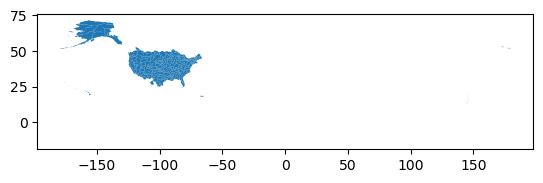

In [ ]:
test.plot()

## YOUR TURN - repeat a similar analysis to answer a question of your choice about fires in the United States

For example, you could:
  * Use different regions, like states (look at data.gov or TIGRIS), or HUC-4 watersheds
  * Calculate a different statistic, like the number of large fires over time
  * Split the time series in two and look at the change

In [68]:
# Join fire data to the watershed data
fire_diff_gdf = wbd4_gdb.sjoin(
    fire_clean_gdf, 
    how="inner", 
    predicate="intersects"
)

import numpy as np
fire_diff_gdf['column_c'] = np.where(fire_diff_gdf['DISCOVERY_DATE'] < "2006", 0, 1)

# Calculate maximum fire size and number of fires by year and watershed
fire_diff_gdf = (fire_diff_gdf.groupby(
    ["name", "column_c"])
    .agg(max_fire_size=("FIRE_SIZE", "max"), 
         num_fires=("index_right", "count"))
)

fire_diff_gdf


max_fire_size  num_fires
name               column_c                          
Alabama            0                3321.0      32604
                   1               27870.0      18793
Allegheny          0                 342.9        729
                   1                 780.0       2773
Altamaha-St. Marys 0              124110.0      40636
...                                    ...        ...
Willamette         1              193573.0       5187
Wisconsin          0                3410.0       6623
                   1                 337.0       5332
Yakima             0              163884.0       2048
                   1              171915.0       2921

[447 rows x 2 columns]

In [69]:
# Join files by name
fire_diff_count_df = (
    fire_diff_gdf
    .reset_index()
    )

fire_diff_count_df = (fire_diff_count_df[["name", "num_fires", "column_c"]]
    .groupby(["name", "column_c"]).sum()
)

fire_diff_count_df

num_fires
name               column_c           
Alabama            0             32604
                   1             18793
Allegheny          0               729
                   1              2773
Altamaha-St. Marys 0             40636
...                                ...
Willamette         1              5187
Wisconsin          0              6623
                   1              5332
Yakima             0              2048
                   1              2921

[447 rows x 1 columns]

In [72]:
fire_diff_gdf = (wbd4_gdb.merge(fire_diff_count_df, on='name', how='right'))
fire_diff_gdf = fire_diff_gdf[["name", "column_c", "num_fires", "area_ha"]]  

KeyError: "['column_c'] not in index"

In [73]:
# Calculate density of fires per hectare
fire_diff_gdf["fire_density_per_mha"] = (
    fire_diff_gdf["num_fires"] / fire_diff_gdf["area_ha"]
)

fire_diff_gdf.fire_density_per_mha

0      5410.468081
1      3118.602829
2       239.967425
3       912.797902
4      7365.456486
          ...     
444    1743.633844
445    2138.954378
446    1722.014910
447    1277.161574
448    1821.576640
Name: fire_density_per_mha, Length: 449, dtype: float64

In [84]:
fire_diff_gdf[fire_diff_gdf.DISCOVERY_DATE < "2006"]

,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,referencegnis_ids,areaacres,areasqkm,states,...,shape_Length,shape_Area,geometry,area_ha,index_right,LATITUDE,LONGITUDE,DISCOVERY_DATE,NWCG_GENERAL_CAUSE,FIRE_SIZE
0,{66B87799-AF14-41BA-9F11-330BF38FA0A5},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},NaN,U.S. Geological Survey,NaN,2022-01-18 16:24:27+00:00,NaN,13203421.45,53432.40,"NM,TX",...,16.748899,5.057862,"MULTIPOLYGON (((-103.84649 33.01354, -103.8452...",5.526032,664796,30.323890,-103.740000,2005-04-28,Arson/incendiarism,17.0
0,{66B87799-AF14-41BA-9F11-330BF38FA0A5},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},NaN,U.S. Geological Survey,NaN,2022-01-18 16:24:27+00:00,NaN,13203421.45,53432.40,"NM,TX",...,16.748899,5.057862,"MULTIPOLYGON (((-103.84649 33.01354, -103.8452...",5.526032,649966,30.333330,-103.737500,2002-05-08,Railroad operations and maintenance,300.0
0,{66B87799-AF14-41BA-9F11-330BF38FA0A5},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},NaN,U.S. Geological Survey,NaN,2022-01-18 16:24:27+00:00,NaN,13203421.45,53432.40,"NM,TX",...,16.748899,5.057862,"MULTIPOLYGON (((-103.84649 33.01354, -103.8452...",5.526032,667730,30.486330,-103.954200,2005-07-26,Natural,1.0
0,{66B87799-AF14-41BA-9F11-330BF38FA0A5},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},NaN,U.S. Geological Survey,NaN,2022-01-18 16:24:27+00:00,NaN,13203421.45,53432.40,"NM,TX",...,16.748899,5.057862,"MULTIPOLYGON (((-103.84649 33.01354, -103.8452...",5.526032,664755,30.492220,-103.804200,2005-06-15,Natural,15.0
0,{66B87799-AF14-41BA-9F11-330BF38FA0A5},{7980C265-8FD8-465F-8CE4-A1B2C94F696D},NaN,U.S. Geological Survey,NaN,2022-01-18 16:24:27+00:00,NaN,13203421.45,53432.40,"NM,TX",...,16.748899,5.057862,"MULTIPOLYGON (((-103.84649 33.01354, -103.8452...",5.526032,664763,30.501940,-103.780000,2005-05-24,Natural,3200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,{567B48C4-0554-419E-9998-BFCAF8F57203},{060BB0D6-9C9A-4919-A859-0787C89C6807},NaN,U.S. Geological Survey,NaN,2023-04-11 16:22:34+00:00,NaN,3103935.02,12561.19,"CT,MA,NY,RI",...,18.418394,1.358411,"MULTIPOLYGON (((-73.02573 41.21304, -73.02548 ...",1.255985,388556,42.390000,-73.270000,2005-04-16,Recreation and ceremony,0.5
243,{567B48C4-0554-419E-9998-BFCAF8F57203},{060BB0D6-9C9A-4919-A859-0787C89C6807},NaN,U.S. Geological Survey,NaN,2023-04-11 16:22:34+00:00,NaN,3103935.02,12561.19,"CT,MA,NY,RI",...,18.418394,1.358411,"MULTIPOLYGON (((-73.02573 41.21304, -73.02548 ...",1.255985,388561,42.390000,-73.280000,2004-04-29,Debris and open burning,0.1
243,{567B48C4-0554-419E-9998-BFCAF8F57203},{060BB0D6-9C9A-4919-A859-0787C89C6807},NaN,U.S. Geological Survey,NaN,2023-04-11 16:22:34+00:00,NaN,3103935.02,12561.19,"CT,MA,NY,RI",...,18.418394,1.358411,"MULTIPOLYGON (((-73.02573 41.21304, -73.02548 ...",1.255985,1824279,42.388793,-73.435553,2001-07-25,Missing data/not specified/undetermined,0.5
243,{567B48C4-0554-419E-9998-BFCAF8F57203},{060BB0D6-9C9A-4919-A859-0787C89C6807},NaN,U.S. Geological Survey,NaN,2023-04-11 16:22:34+00:00,NaN,3103935.02,12561.19,"CT,MA,NY,RI",...,18.418394,1.358411,"MULTIPOLYGON (((-73.02573 41.21304, -73.02548 ...",1.255985,1807107,42.395303,-73.417360,2004-06-04,Missing data/not specified/undetermined,0.1
